In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

In [2]:
# 划分训练集和测试集
df = pd.read_csv('./data/uswc.csv')
df.head()

,warehouse_code,order_date,order_num
0,AUMELA,2020-01-01 00:00:00,3
1,AUMELA,2020-01-28 00:00:00,10
2,AUMELA,2020-02-28 00:00:00,8
3,AUMELA,2020-02-29 00:00:00,4
4,AUMELA,2020-03-28 00:00:00,4


In [3]:
df_example=df[(df['warehouse_code']=='GBLTNA') & (df['order_date']>'2020-06-01')].sort_values(by='order_date')

In [4]:
# 缺失值填充
df_example['Timestamp'] = pd.to_datetime(df_example['order_date'], format='%Y-%m-%d %H:%M:%S')
df_example.index = df_example['Timestamp']
df_example = df_example.resample('D').mean().fillna(0)

In [5]:
# 初始化预测集
forecast_len = 7
## 获取起始时间
from datetime import timedelta
df_begin = df_example.index.max()+timedelta(days=1)
y_hat_avg = pd.DataFrame(
    index = pd.date_range(start=df_begin, periods=forecast_len),
    columns = ['Holt_Winter',]
)

/home/ricoo/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/ricoo/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


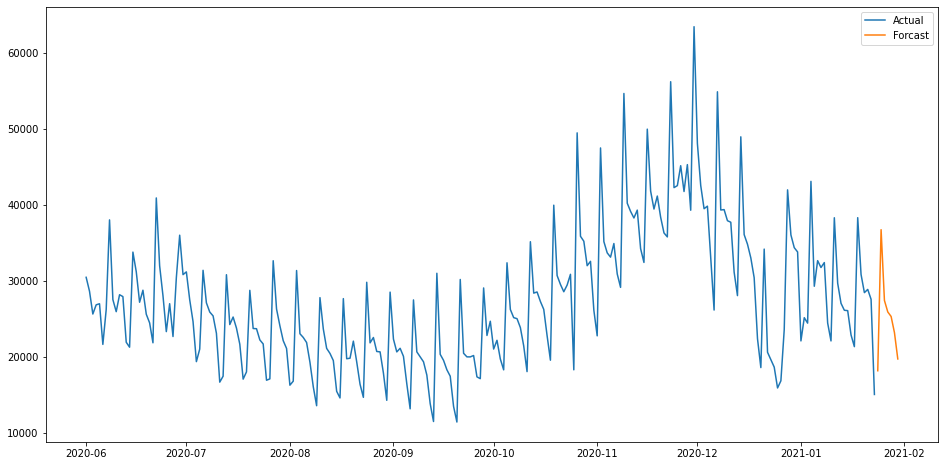

In [6]:
# 模型训练
fit1 = ExponentialSmoothing(np.asarray(df_example['order_num']), seasonal_periods=7, trend='add', seasonal='add', ).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(forecast_len)
plt.figure(figsize=(16, 8))
plt.plot(df_example['order_num'], label='Actual')
plt.plot(y_hat_avg['Holt_Winter'], label='Forcast')
plt.legend(loc='best')
plt.show()